# AVOCADO 가격 예측 (Facebook Prophet ) 



# STEP #0: 데이터셋

- 데이터는 미국의 아보카도 리테일 데이터 입니다. (2018년도 weekly 데이터)  
- 아보카도 거래량과 가격이 나와 있습니다. 

컬럼 설명 :

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold 
- 4046 - Total number of avocados with PLU 4046 sold - PLU는 농산물 코드입니다
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



# STEP #1: 데이터 준비

### Prophet 라이브러리

- install : 
     pip install fbprophet
     
- 위 에러 발생시 : 
    conda install -c conda-forge fbprophet
 

- 레퍼런스 : https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [6]:
# 프로펫 라이브러리가 fbprophet 에서 그냥 prophet 으로 변경되었음.

In [5]:
# import libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from prophet import Prophet


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ml_plus/data')

In [11]:
# avocado.csv 데이터 읽기
df = pd.read_csv('avocado.csv' , index_col = 0)

In [ ]:
# 날자별로 데이터가 있는 형식 => Time Series Data 

In [12]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# STEP #2: EDA(Exploratory Data Analysis) :  탐색적 데이터 분석

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [17]:
df['year'].unique()

array([2015, 2016, 2017, 2018])

In [19]:
df['region'].nunique()

54

In [20]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### 필요없는 맨 처음 컬럼을 제거하시오

### 데이터의 날짜가 뒤죽박죽 입니다. 날짜로 정렬하시오.

In [23]:
df.sort_values('Date', inplace = True)

In [24]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


### 날짜별로 가격이 어떻게 변하는지 간단하게 확인하시오. (plot 이용)

In [27]:
df_date = df.groupby('Date')['AveragePrice'].mean()

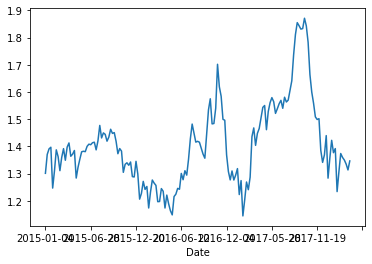

In [29]:
df_date.plot()
plt.show()

### 'region' 별로 데이터 몇개인지 시각화 하시오.

In [31]:
df['region'].value_counts()

Southeast              338
NewOrleansMobile       338
SanDiego               338
BaltimoreWashington    338
Roanoke                338
RichmondNorfolk        338
Northeast              338
SouthCentral           338
GreatLakes             338
Louisville             338
Seattle                338
CincinnatiDayton       338
NewYork                338
Indianapolis           338
Chicago                338
Jacksonville           338
Columbus               338
Detroit                338
Philadelphia           338
PhoenixTucson          338
Nashville              338
Portland               338
HartfordSpringfield    338
Tampa                  338
Orlando                338
West                   338
Denver                 338
GrandRapids            338
NorthernNewEngland     338
BuffaloRochester       338
HarrisburgScranton     338
Pittsburgh             338
Boise                  338
LosAngeles             338
LasVegas               338
Atlanta                338
DallasFtWorth          338
M

In [32]:
import seaborn as sb

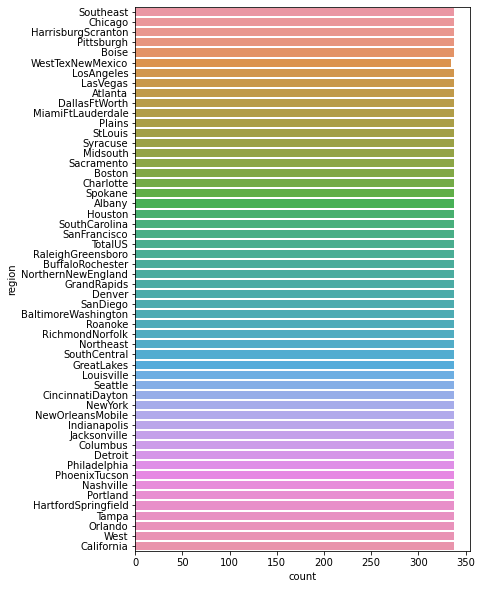

In [35]:
plt.figure(figsize=(6,10))
sb.countplot(data = df, y = 'region')
plt.show()

### 년도('year')별로 데이터가 몇건인지 확인하시오.

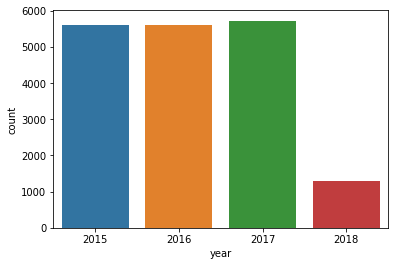

In [36]:
sb.countplot(data = df, x = 'year')
plt.show()

In [37]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California
0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


### 프로펫 분석을 위해, 두개의 컬럼만 가져오시오. ('Date', 'AveragePrice')

In [38]:
avocado_prophet_df = df[ ['Date' , 'AveragePrice'] ]


In [39]:
avocado_prophet_df

,Date,AveragePrice
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


# STEP 3: Prophet 을 이용한 예측 수행

### ds 와 y 로 컬럼명을 셋팅하시오.

In [42]:
avocado_prophet_df.columns = ['ds', 'y']


In [43]:
avocado_prophet_df

,ds,y
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


### 프로펫 예측 하시오.

In [45]:
# 1. 라이브러리를 변수로 만들고,
prophet = Prophet()

In [46]:
# 2. 데이터로, 학습 시킨다.
prophet.fit(avocado_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
# 365일치를 예측하시오.
# 3. 예측하고자 하는 기간을 정해서, 비어있는 데이터 프레임을 만든다!
future = prophet.make_future_dataframe(periods=365, freq='D')

In [49]:
# 4. 이제, 미래 날짜까지 만들어져 있으니,
#    위의 future 데이터프레임을 이용해서, 예측할 수 있다.
forecast = prophet.predict(future)

In [50]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498608,0.888047,1.906005,1.498608,1.498608,-0.113270,-0.113270,-0.113270,-0.113270,-0.113270,-0.113270,0.0,0.0,0.0,1.385337
1,2015-01-11,1.493471,0.917796,1.872411,1.493471,1.493471,-0.104849,-0.104849,-0.104849,-0.104849,-0.104849,-0.104849,0.0,0.0,0.0,1.388621
2,2015-01-18,1.488334,0.919249,1.836725,1.488334,1.488334,-0.104524,-0.104524,-0.104524,-0.104524,-0.104524,-0.104524,0.0,0.0,0.0,1.383810
3,2015-01-25,1.483198,0.847421,1.858985,1.483198,1.483198,-0.123469,-0.123469,-0.123469,-0.123469,-0.123469,-0.123469,0.0,0.0,0.0,1.359729
4,2015-02-01,1.478061,0.826621,1.803888,1.478061,1.478061,-0.151828,-0.151828,-0.151828,-0.151828,-0.151828,-0.151828,0.0,0.0,0.0,1.326232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161728,0.573100,1.616289,0.976341,1.339494,-0.086221,-0.086221,-0.086221,-0.086221,-0.086221,-0.086221,0.0,0.0,0.0,1.075508
530,2019-03-22,1.160997,0.575330,1.591206,0.974895,1.339915,-0.084549,-0.084549,-0.084549,-0.084549,-0.084549,-0.084549,0.0,0.0,0.0,1.076448
531,2019-03-23,1.160266,0.566178,1.607234,0.973517,1.339712,-0.082604,-0.082604,-0.082604,-0.082604,-0.082604,-0.082604,0.0,0.0,0.0,1.077662
532,2019-03-24,1.159535,0.536495,1.604417,0.972382,1.339829,-0.080406,-0.080406,-0.080406,-0.080406,-0.080406,-0.080406,0.0,0.0,0.0,1.079129


In [ ]:
# 차트로 확인하시오.


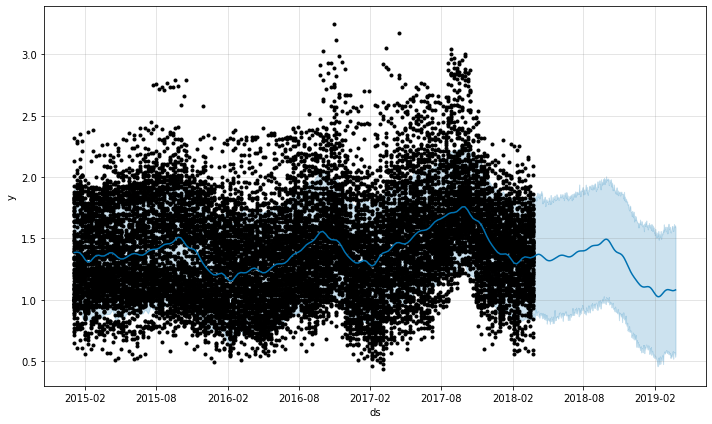

In [52]:
prophet.plot(forecast)
plt.savefig('chart1.jpg')

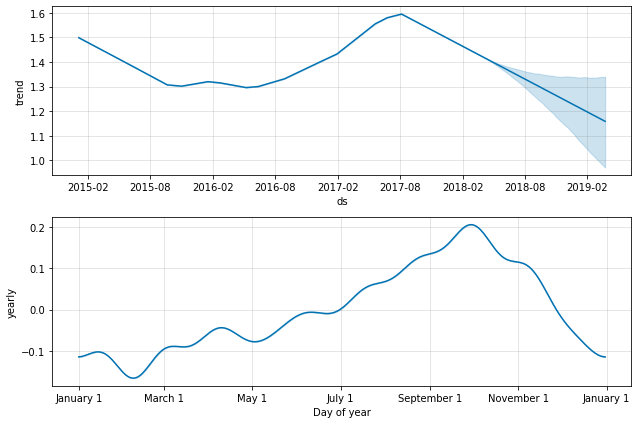

In [54]:
prophet.plot_components(forecast)
plt.savefig('chart2.jpg')

# PART 2 : region 이 west 인 아보카도의 가격을 예측하시오.

In [ ]:
avocado_df_sample = 

# 결론??